In [2]:
import numpy as np
import json
from tabulate import tabulate
import random
from sklearn.model_selection import train_test_split

np.set_printoptions(threshold=np.inf)

In [3]:
CLASSES = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
           'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
DATA_DIR = "Dataset/"
FILES = []
for i in range(0, 15):
    i += 1
    d = "User" + str(i) + ".json"
    FILES.append(d)
    
#print(FILES)

In [4]:
def load_data():
    dataset = []
    for_print = []
    
    for file in FILES:
        with open(DATA_DIR + file, 'r') as f:
            data = json.load(f)
            
            for letter in data:
                num = len(letter["fingerprint"])
                
                if num > 0:
                    l = letter["letter"]
                    points = letter["fingerprint"]
                    
                    d = [l, num, points]
                    dataset.append(d)
                    d = []

                    ar = [l, num]
                    for_print.append(ar)
                    
        print(str(file) + " done.")
        
    return dataset, for_print

In [5]:
dataset, for_print = load_data()

print("\nDataset length: " + str(len(dataset)))
#print(tabulate(for_print, headers=["Letter", "Number of points"]))

User1.json done.
User2.json done.
User3.json done.
User4.json done.
User5.json done.
User6.json done.
User7.json done.
User8.json done.
User9.json done.
User10.json done.
User11.json done.
User12.json done.
User13.json done.
User14.json done.
User15.json done.

Dataset length: 5849


In [5]:
#print(dataset[0])

In [6]:
all_points = 0

for d in dataset:
    all_points += d[1]

average_points = all_points // len(dataset)
#average_points = 350
print("Average number of points: " + str(average_points))
print("--------------------------------")

for d in dataset:
    letter_points = d[1]
    difference = letter_points - average_points
    
    if difference > 0:
        while difference > 0:
            random_index = random.randint(0, d[1]-1)
            d[2].pop(random_index)
            d[1] -= 1
            difference -= 1
        
    elif difference < 0:
        while difference < 0:
            before_index = random.randint(0, d[1]-2)
            after_index = before_index + 1
            
            new_x = (d[2][before_index][0] + d[2][after_index][0]) / 2
            new_y = (d[2][before_index][1] + d[2][after_index][1]) / 2
            new_z = (d[2][before_index][2] + d[2][after_index][2]) / 2
            
            new_point = [new_x, new_y, new_z]
            
            d[2].insert(after_index, new_point)
            d[1] += 1
                
            difference += 1

Average number of points: 198
--------------------------------


In [7]:
#print(dataset[0][2])

In [7]:
random.shuffle(dataset)

X = []
y = []

for label, num, points in dataset:
    X.append(points)
    y.append(label)

#print(X[0])

In [8]:
X_reshaped = []

for x in X:
    x = np.array(x).reshape((198*3))
    X_reshaped.append(x)
    
#print(X_reshaped[0:3])

In [11]:
X_train , X_test , y_train, y_test = train_test_split(X_reshaped, y, test_size = 0.2, shuffle = False, random_state = 42)

print("X_train length: " + str(len(X_train)) + "  y_train length: " + str(len(y_train)))
print("X_test length: " + str(len(X_test)) + "  y_test length: " + str(len(y_test)))

X_train length: 4679  y_train length: 4679
X_test length: 1170  y_test length: 1170


In [12]:
### RANDOM FOREST ###

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train , y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           A       0.65      0.83      0.73        29
           B       0.91      0.90      0.90        58
           C       0.89      0.89      0.89        53
           D       0.68      0.58      0.63        45
           E       0.73      0.85      0.79        39
           F       0.55      0.62      0.58        37
           G       0.65      0.74      0.69        42
           H       0.73      0.63      0.68        43
           I       0.87      0.74      0.80        54
           J       0.87      0.78      0.82        50
           K       0.60      0.57      0.58        44
           L       0.89      0.89      0.89        44
           M       0.82      0.78      0.80        46
           N       0.80      0.70      0.75        47
           O       0.66      0.74      0.70        39
           P       0.72      0.66      0.69        59
           Q       0.69      0.89      0.78        38
           R       0.66    

In [14]:
#print(y_pred)

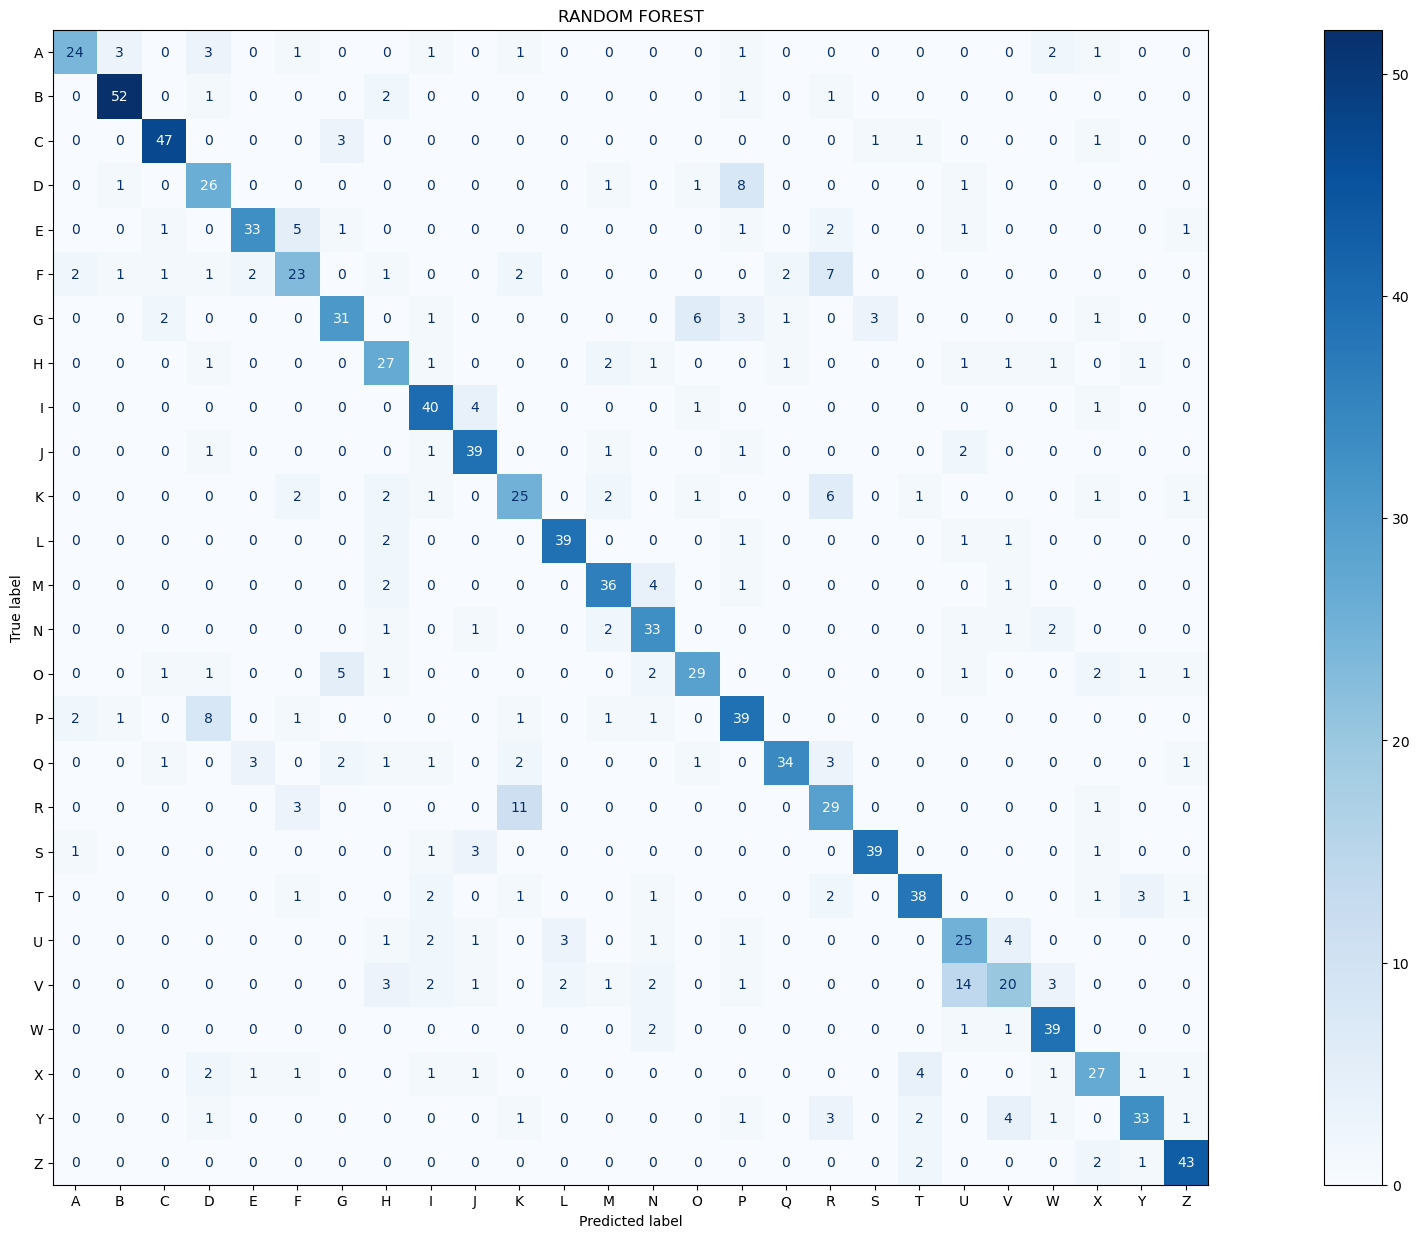

In [20]:
### RANDOM FOREST CONFUSION MATRIX ###

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 15]

disp = ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    y_test,
    display_labels=CLASSES,
    cmap=plt.cm.Blues
)

disp.ax_.set_title("RANDOM FOREST")

#plt.savefig('RandomForest.png', bbox_inches='tight')
plt.show()

In [20]:
### RANDOM FOREST TOP-5 ###

predictions = model.classes_[np.argsort(model.predict_proba(X_test))[:, :-5 - 1:-1]]

print(len(y_pred))
test_number = len(y_test)
counter = 0
top1 = 0
top2 = 0
top3 = 0
top4 = 0
top5 = 0

for i in range(0, len(y_test)):
    if y_test[i] in predictions[i]:
        counter += 1
        
        if y_test[i] == predictions[i][0]:
            top1 += 1
        elif y_test[i] == predictions[i][1]:
            top2 += 1
        elif y_test[i] == predictions[i][2]:
            top3 += 1
        elif y_test[i] == predictions[i][3]:
            top4 += 1
        elif y_test[i] == predictions[i][4]:
            top5 += 1
    
counter_per = counter / test_number
top1_per = top1 / test_number
top2_per = top2 / test_number
top3_per = top3 / test_number
top4_per = top4 / test_number
top5_per = top5 / test_number

import math
#counter_per = math.floor(counter_per * 10 ** 4) / 10 ** 4
print("Predicted in top 5: " + str(counter) + " ---> " + str(round(counter_per, 2)))
print("Top1: " + str(top1) + " ---> " + str(round(top1_per, 2)*100))
print("Top2: " + str(top2) + " ---> " + str(round(top2_per, 2)*100))
print("Top3: " + str(top3) + " ---> " + str(round(top3_per, 2)*100))
print("Top4: " + str(top4) + " ---> " + str(round(top4_per, 2)*100))
print("Top5: " + str(top5) + " ---> " + str(round(top5_per, 2)*100))

1170
Predicted in top 5: 1102 ---> 0.94
Top1: 877 ---> 75.0
Top2: 125 ---> 11.0
Top3: 50 ---> 4.0
Top4: 29 ---> 2.0
Top5: 21 ---> 2.0


In [13]:
### SAVE RANDOM FOREST MODEL ###

import pickle

model_file_name = "RandomForestModel.pickle"

with open(model_file_name, 'wb') as f:
    pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)

In [18]:
loaded_model = pickle.load(open(model_file_name, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7435897435897436


In [14]:
### KNN CLASIFIER ###

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 4)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
y_pred_knn

accuracy_score(y_pred_knn, y_test)
print(classification_report(y_pred_knn, y_test))

              precision    recall  f1-score   support

           A       0.78      0.59      0.67        49
           B       0.74      0.74      0.74        57
           C       0.91      0.71      0.79        68
           D       0.68      0.57      0.62        46
           E       0.71      0.73      0.72        44
           F       0.45      0.47      0.46        40
           G       0.65      0.65      0.65        48
           H       0.70      0.50      0.58        52
           I       0.87      0.70      0.78        57
           J       0.84      0.75      0.79        51
           K       0.60      0.60      0.60        42
           L       0.89      0.76      0.82        51
           M       0.84      0.74      0.79        50
           N       0.73      0.73      0.73        41
           O       0.50      0.79      0.61        28
           P       0.67      0.73      0.70        49
           Q       0.53      0.87      0.66        30
           R       0.55    

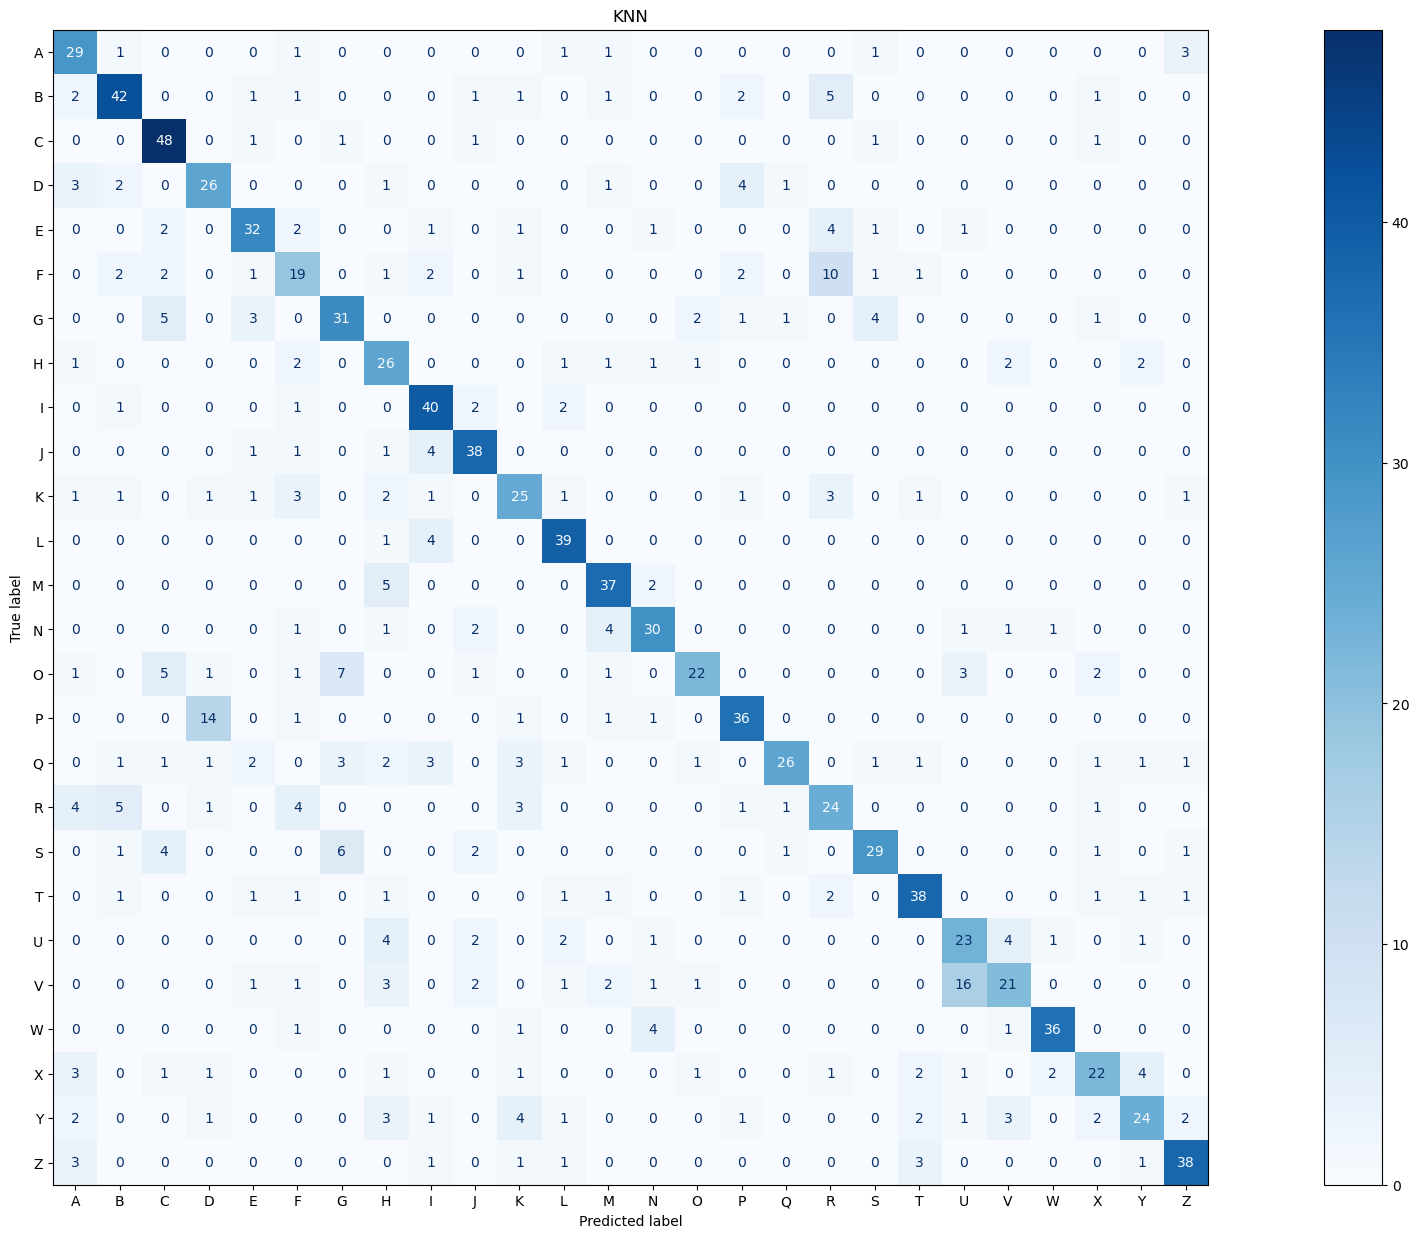

In [22]:
### KNN CONFUSION MATRIX ###

from sklearn.metrics import ConfusionMatrixDisplay
plt.rcParams['figure.figsize'] = [30, 15]

disp = ConfusionMatrixDisplay.from_estimator(
    knn,
    X_test,
    y_test,
    display_labels=CLASSES,
    cmap=plt.cm.Blues
)

disp.ax_.set_title("KNN")

#plt.savefig('KNN.png', bbox_inches='tight')
plt.show()

In [23]:
### KNN TOP-5 ###

predictions = knn.classes_[np.argsort(knn.predict_proba(X_test))[:, :-5 - 1:-1]]

print(len(y_pred_knn))
test_number = len(y_test)
counter = 0
top1 = 0

for i in range(0, len(y_test)):
    if y_test[i] in predictions[i]:
        counter += 1
        
        if y_test[i] == predictions[i][0]:
            top1 += 1
    
counter_per = counter / test_number
top1_per = top1 / test_number

import math
#counter_per = math.floor(counter_per * 10 ** 4) / 10 ** 4
print("Predicted in top 5: " + str(counter) + " ---> " + str(round(counter_per, 2)))
print("Top1: " + str(top1) + " ---> " + str(round(top1_per, 2)*100))
print("Top2: " + str(top2) + " ---> " + str(round(top2_per, 2)*100))
print("Top3: " + str(top3) + " ---> " + str(round(top3_per, 2)*100))
print("Top4: " + str(top4) + " ---> " + str(round(top4_per, 2)*100))
print("Top5: " + str(top5) + " ---> " + str(round(top5_per, 2)*100))

1170
Predicted in top 5: 1047 ---> 0.89
Top1: 820 ---> 70.0
Top2: 125 ---> 11.0
Top3: 50 ---> 4.0
Top4: 29 ---> 2.0
Top5: 21 ---> 2.0


In [23]:
### DECISION TREE ###

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
y_pred_dtc

accuracy_score(y_pred_dtc, y_test)
print(classification_report(y_pred_dtc, y_test))

              precision    recall  f1-score   support

           A       0.46      0.40      0.42        43
           B       0.39      0.44      0.41        50
           C       0.51      0.57      0.54        47
           D       0.37      0.30      0.33        47
           E       0.47      0.51      0.49        41
           F       0.36      0.31      0.33        49
           G       0.33      0.42      0.37        38
           H       0.41      0.30      0.34        50
           I       0.46      0.36      0.40        59
           J       0.71      0.57      0.63        56
           K       0.31      0.30      0.30        44
           L       0.55      0.69      0.61        35
           M       0.48      0.47      0.47        45
           N       0.46      0.51      0.49        37
           O       0.39      0.47      0.42        36
           P       0.44      0.48      0.46        50
           Q       0.33      0.39      0.36        41
           R       0.27    

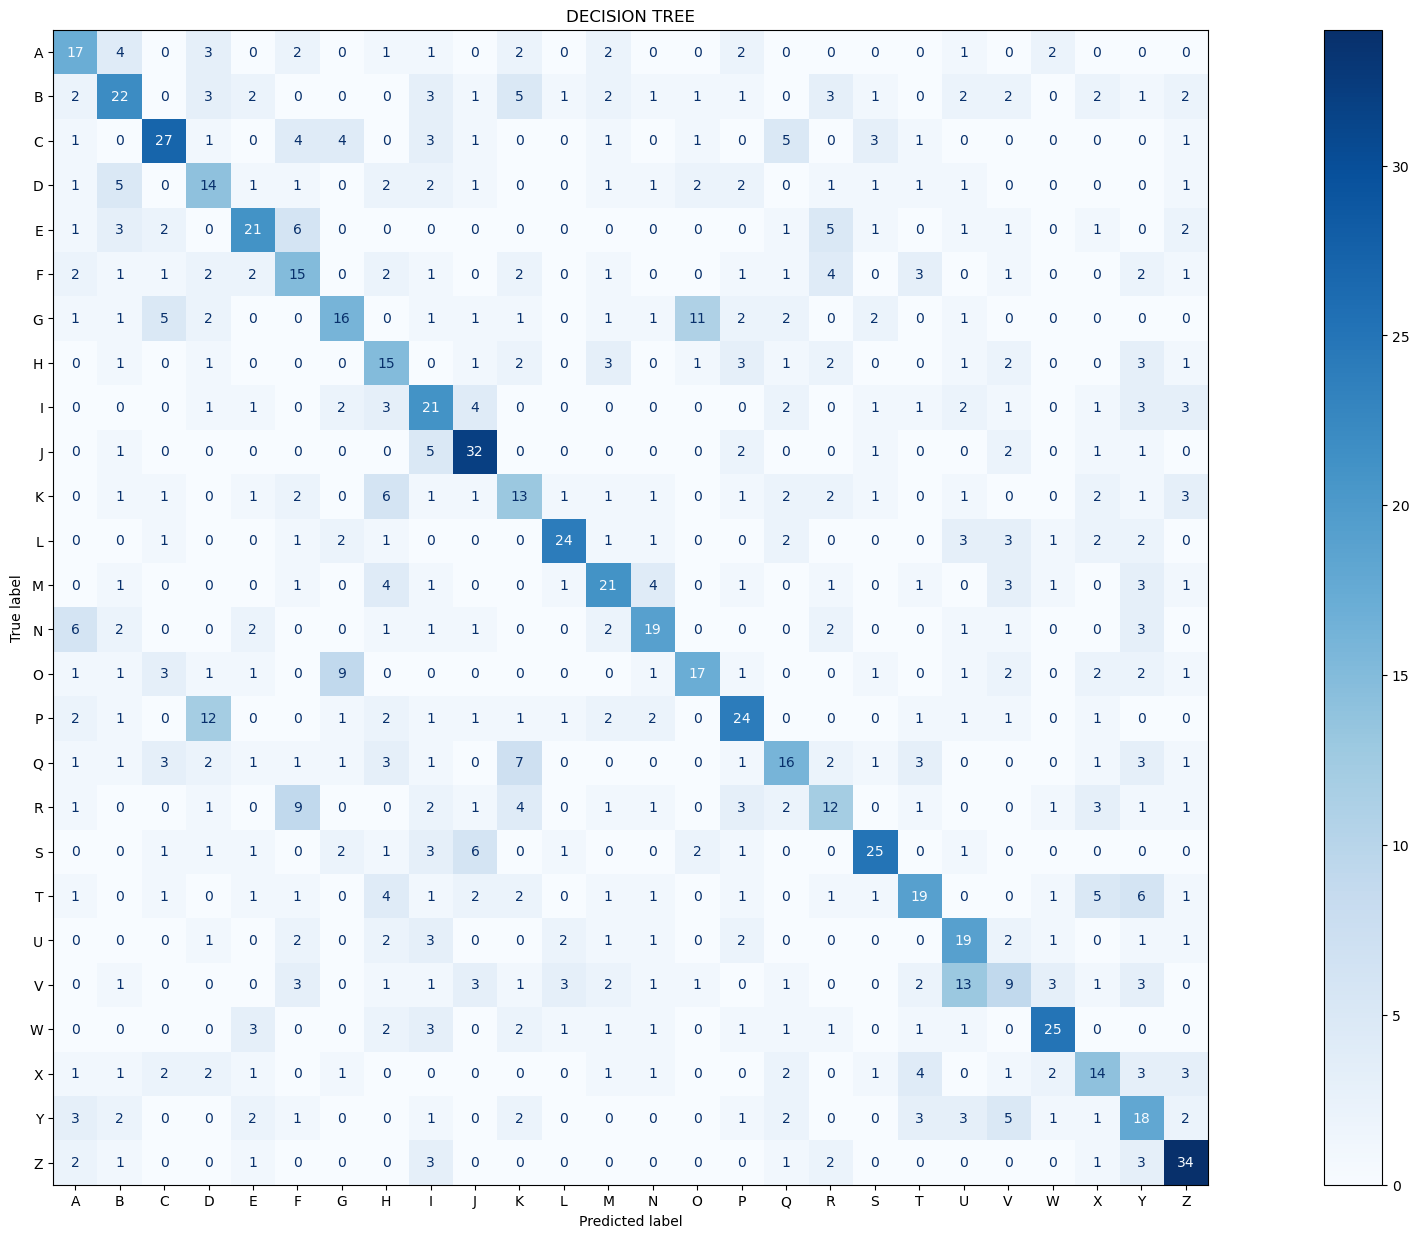

In [24]:
### DECISION TREE CONFUSION MATRIX ###

from sklearn.metrics import ConfusionMatrixDisplay
plt.rcParams['figure.figsize'] = [30, 15]

disp = ConfusionMatrixDisplay.from_estimator(
    dtc,
    X_test,
    y_test,
    display_labels=CLASSES,
    cmap=plt.cm.Blues
)

disp.ax_.set_title("DECISION TREE")

#plt.savefig('DecisionTree.png', bbox_inches='tight')
plt.show()

In [24]:
### DECISION TREE TOP-5 ###

predictions = dtc.classes_[np.argsort(dtc.predict_proba(X_test))[:, :-5 - 1:-1]]

print(len(y_pred_knn))
test_number = len(y_test)
counter = 0
top1 = 0

for i in range(0, len(y_test)):
    if y_test[i] in predictions[i]:
        counter += 1
        
        if y_test[i] == predictions[i][0]:
            top1 += 1
    
counter_per = counter / test_number
top1_per = top1 / test_number

import math
#counter_per = math.floor(counter_per * 10 ** 4) / 10 ** 4
print("Predicted in top 5: " + str(counter) + " ---> " + str(round(counter_per, 2)))
print("Top1: " + str(top1) + " ---> " + str(round(top1_per, 2)*100))
print("Top2: " + str(top2) + " ---> " + str(round(top2_per, 2)*100))
print("Top3: " + str(top3) + " ---> " + str(round(top3_per, 2)*100))
print("Top4: " + str(top4) + " ---> " + str(round(top4_per, 2)*100))
print("Top5: " + str(top5) + " ---> " + str(round(top5_per, 2)*100))

1170
Predicted in top 5: 638 ---> 0.55
Top1: 550 ---> 47.0
Top2: 125 ---> 11.0
Top3: 50 ---> 4.0
Top4: 29 ---> 2.0
Top5: 21 ---> 2.0


In [25]:
### GAUSSIAN NB CLASIFIER ###

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)
y_pred_nb

accuracy_score(y_pred_nb, y_test)
print(classification_report(y_pred_nb, y_test))

              precision    recall  f1-score   support

           A       0.35      0.33      0.34        39
           B       0.02      0.05      0.03        19
           C       0.17      0.64      0.27        14
           D       0.08      0.14      0.10        22
           E       0.13      0.46      0.21        13
           F       0.00      0.00      0.00        12
           G       0.17      0.47      0.25        17
           H       0.35      0.11      0.17       117
           I       0.48      0.22      0.30       101
           J       0.22      0.53      0.31        19
           K       0.12      0.19      0.14        27
           L       0.75      0.10      0.18       330
           M       0.27      0.86      0.41        14
           N       0.32      0.50      0.39        26
           O       0.27      0.34      0.30        35
           P       0.37      0.29      0.33        68
           Q       0.14      0.37      0.21        19
           R       0.43    

In [25]:
### GAUSSIAN NB TOP-5 ###

predictions = nb.classes_[np.argsort(nb.predict_proba(X_test))[:, :-5 - 1:-1]]

print(len(y_pred_knn))
test_number = len(y_test)
counter = 0
top1 = 0

for i in range(0, len(y_test)):
    if y_test[i] in predictions[i]:
        counter += 1
        
        if y_test[i] == predictions[i][0]:
            top1 += 1
    
counter_per = counter / test_number
top1_per = top1 / test_number

import math
#counter_per = math.floor(counter_per * 10 ** 4) / 10 ** 4
print("Predicted in top 5: " + str(counter) + " ---> " + str(round(counter_per, 2)))
print("Top1: " + str(top1) + " ---> " + str(round(top1_per, 2)*100))
print("Top2: " + str(top2) + " ---> " + str(round(top2_per, 2)*100))
print("Top3: " + str(top3) + " ---> " + str(round(top3_per, 2)*100))
print("Top4: " + str(top4) + " ---> " + str(round(top4_per, 2)*100))
print("Top5: " + str(top5) + " ---> " + str(round(top5_per, 2)*100))

1170
Predicted in top 5: 644 ---> 0.55
Top1: 251 ---> 21.0
Top2: 125 ---> 11.0
Top3: 50 ---> 4.0
Top4: 29 ---> 2.0
Top5: 21 ---> 2.0


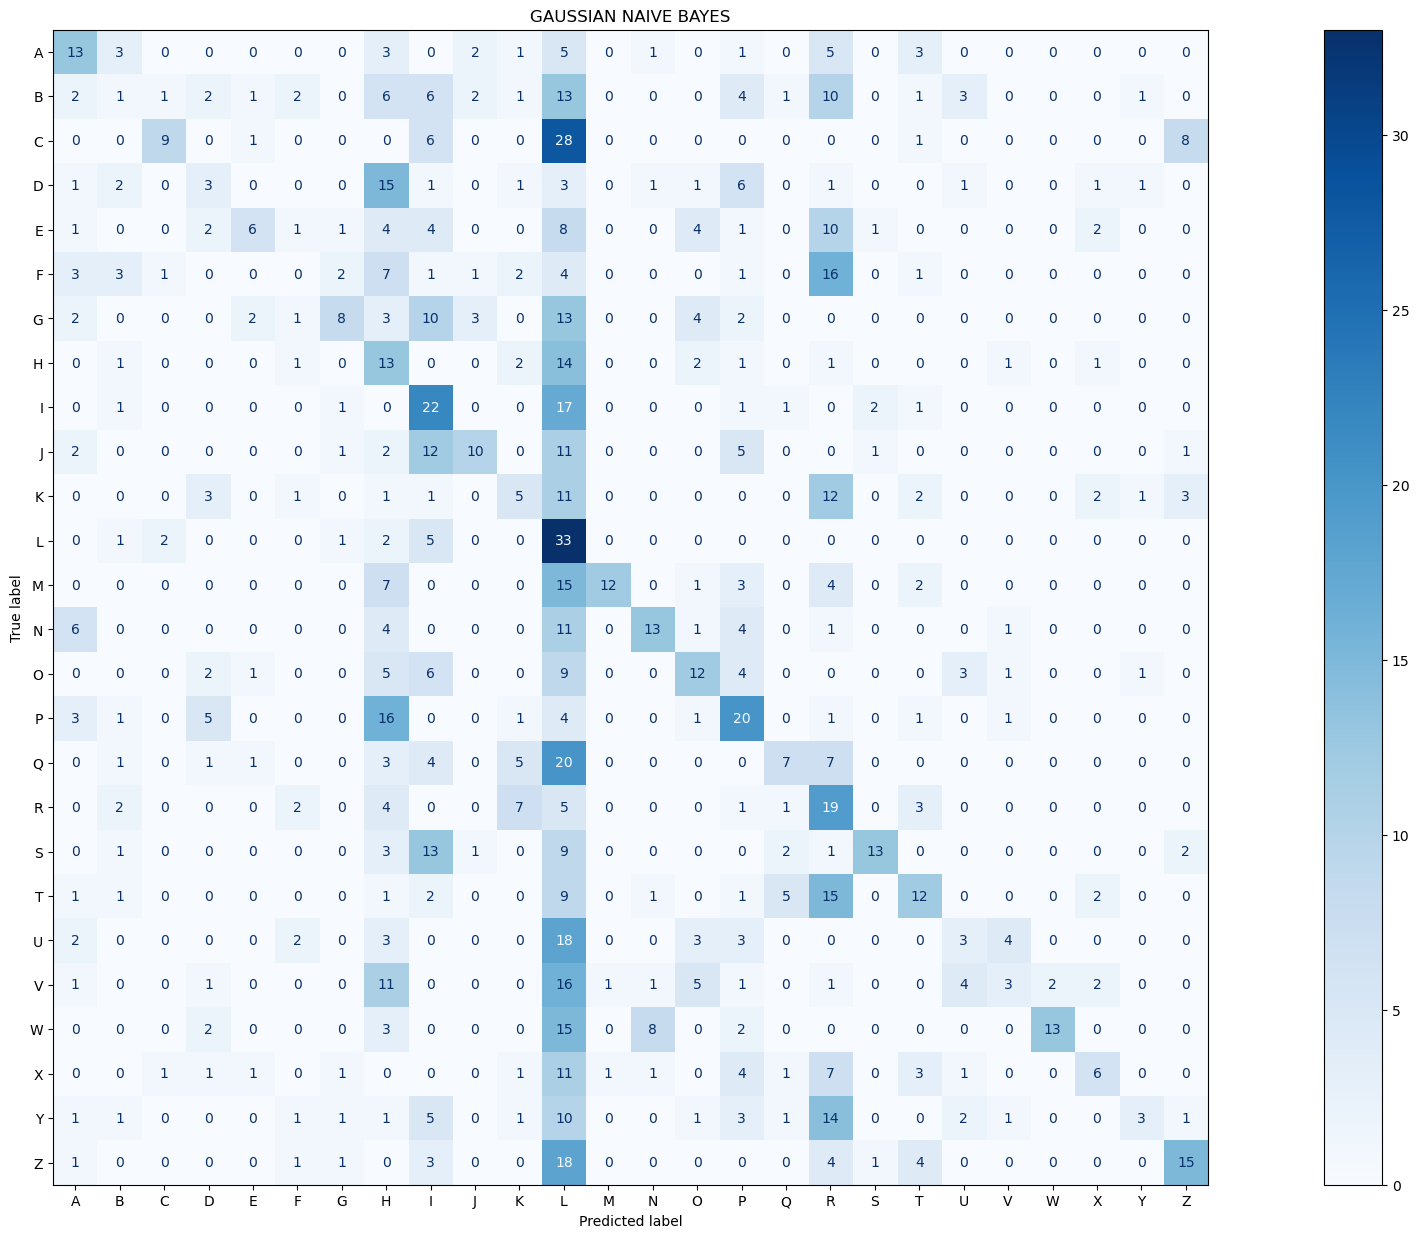

In [26]:
### GAUSSIAN NB CONFUSION MATRIX ###

from sklearn.metrics import ConfusionMatrixDisplay
plt.rcParams['figure.figsize'] = [30, 15]

disp = ConfusionMatrixDisplay.from_estimator(
    nb,
    X_test,
    y_test,
    display_labels=CLASSES,
    cmap=plt.cm.Blues
)

disp.ax_.set_title("GAUSSIAN NAIVE BAYES")

#plt.savefig('Gaussian NB.png', bbox_inches='tight')
plt.show()